# **Question 1**

**Round off error in long term integrations of planetary orbits**

Modelling the growth of the error over N operations as a random walk gives *Brouwer's Law*, which states that the total error after N steps will be $$ \approx \sqrt{N}\epsilon$$ where $\epsilon \sim 10^{-16}$ for a double precision float.

The *semi-implicit Euler method* involves updating the velocity and position of the planet from timestep *n* to timestep $n + 1$ according to
$$ v_{n+1} = v_n + a_n\Delta t$$
$$ = v_n - \frac{\mu x_n}{r^3}\Delta t$$
$$ x_{n+1} = x_n + v_{n+1}\Delta t$$

with r = radius of Earth from the Sun and $\mu$ is the gravitational parameter of the sun (also called $GM$).
In this scheme, the velocity is updated first using the acceleration, and then the value of position is updated using the new velocity.

### a) **Semi-Implicit Euler Method**
Write a code which uses the semi-implicit Euler method to follow the Earth's orbit around the sun. Integrate the orbit for 1 year and plot orbit in the x-y plane to check the Earth moves as expected.

Assume:
- $\mu \approx (GM)_{Sun} = 1.3271 \times 10^{20}$ N
- $1 AU = 1.496 \times 10^{11}$ m

$$F = ma = \frac{\mu m}{r^2}$$
$$ \therefore a = \frac{\mu}{r^2}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set Up Variables
gm_Sun = 1.3271 * (10**20) # Newtons
rad = 1.496 * (10**11) # Metres

# Sun at origin
x_0 = rad # Initial Earth coordinates on the x-axis
vy_0 = (2*np.pi*rad)/(365.25 * 86400) # v = d/t = 2*pi*r/t

n = int(365.25 * 86400) # approximate number of seconds in 1 year
dt = 1 # Delta t is 1 second

def update_v(v, gm, x, rad, dt):
    new_v = v - (gm*x)/(rad**3)*dt
    return new_v

def update_x(x, new_v, dt):
    new_x = x + new_v * dt
    return new_x

In [ ]:
x = np.zeros(n)
y = np.zeros(n) # Initial y = 0
vx = np.zeros(n)# Initial vx = 0
vy = np.zeros(n)

x[0] = x_0
vy[0] = vy_0

for i in range(0, int(365.25 * 86400) - 1, dt):
    rad = (x[i]**2 + y[i]**2)**0.5
    vx[i+1] = update_v(vx[i], gm_Sun, x[i], rad, dt)
    vy[i+1] = update_v(vy[i], gm_Sun, y[i], rad, dt)

    x[i+1] = update_x(x[i], vx[i+1], dt)
    y[i+1] = update_x(y[i], vy[i+1], dt)
  

In [ ]:
plt.plot(x, y, 'go', markersize = 1, label = 'Orbit Path')
plt.plot(0, 0, 'yo', label = 'Sun')        #yellow marker for the sun
plt.plot(x[0], 0, 'bo', label = 'Earth Initial Positon')  #dark blue marker for earth's initial position
plt.axis('equal')
plt.xlabel ('x')
plt.ylabel ('y')
plt.title("Orbit of Earth over 1 year")
#plt.legend()

### b) **Fractional Energy Change**

Using different timesteps $\Delta t$ ranging from $\Delta t = 0.1$ years to $\approx 10^{-9}$ years $(\approx 0.04 seconds)$, plot the fractional energy change $\frac{\Delta E}{E}$ against timestep $\Delta t$ and number of steps $N$.
$$\frac{\Delta E}{E} = \frac{E_{final} - E_{initial}}{E_{initial}}$$
$$E = E_{grav} + E_{kinetic} =\frac{GMm}{r} + {\frac{1}{2} mv^2} \approx \frac{\mu m}{r} + \frac{1}{2} mv^2$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from tqdm import tqdm

# Set Up Variables
gm_Sun = 1.3271 * (10**20) # Newtons

seconds_per_year = int(365.25 * 86400) # approximate number of seconds in 1 year
dt = 10 # Delta t
num_steps = int(seconds_per_year/dt)
print(num_steps)

def e_grav(mu, r):
    m_earth = 5.97219*10**24 # kilograms
    return mu*m_earth/r # Joules

def e_kinetic(vx, vy):
    m_earth = 5.97219*10**24 # kilograms
    v_total = (vx**2 + vy**2)**0.5
    return 0.5*m_earth*(v_total**2) # 1/2 mv^2

def update_v(v, gm, x, rad, dt):
    new_v = v - (gm*x)/(logsumexp(rad**3))*dt
    return new_v

def update_x(x, new_v, dt):
    new_x = x + new_v * dt
    return new_x

x_lists = []
y_lists = []
vx_lists = []
vy_lists = []

e_final_list = []

N_list = []
dt_list = []


while dt <= 10000000 and num_steps > 0:
#while True:
    # Logarithmically scale dt from 0.1 up to the number of seconds in a year

    rad = 1.496 * (10**11) # Metres

    # Sun at origin
    x_0 = rad # Initial Earth coordinates on the x-axis
    vy_0 = (2*np.pi*rad)/(365.25 * 86400) # v = d/t = 2*pi*r/t
    
    e_0 = e_grav(gm_Sun, rad) + e_kinetic(0, vy_0)


    x = np.zeros(num_steps)
    y = np.zeros(num_steps) # Initial y = 0
    vx = np.zeros(num_steps)# Initial vx = 0
    vy = np.zeros(num_steps)

    x[0] = x_0
    vy[0] = vy_0

    for i in tqdm(range(0, num_steps - 1)):
        rad = (x[i]**2 + y[i]**2)**0.5
        vx[i+1] = update_v(vx[i], gm_Sun, x[i], rad, dt)
        vy[i+1] = update_v(vy[i], gm_Sun, y[i], rad, dt)

        x[i+1] = update_x(x[i], vx[i+1], dt)
        y[i+1] = update_x(y[i], vy[i+1], dt)

    e_final = e_grav(gm_Sun, rad) + e_kinetic(vx[-1], vy[-1])

    e_final_list.append(e_final)

    print("Initial vx, vy: ", 0, vy_0)
    print("Final vx, vy: ", vx[-1], vy[-1])
    
    x_lists.append(x)
    y_lists.append(y)
    vx_lists.append(vx)
    vy_lists.append(vy)

    N_list.append(num_steps)
    dt_list.append(dt)
    #break
    dt *= 10
    num_steps = int(seconds_per_year/dt)
  

In [ ]:
e_final_array = np.array(e_final_list)
e_frac_change = (e_final_array - e_0)/e_0

In [ ]:
print(dt_list)
print(N_list)
print(e_frac_change)
print(e_final_array)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

temp_dt = np.array([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
temp_N = np.array([31557600, 3155760, 315576, 31557, 3155, 315, 31, 3])
temp_efrac = np.array([-2.68972615e-10, -1.75527001e-09, -1.69942438e-08, -2.20601825e-07, -7.63854926e-06, -5.79910504e-04, -6.36667283e-02,  6.19291490e-01])
temp_efinal = np.array([7.94714693e+33, 7.94714692e+33, 7.94714679e+33, 7.94714518e+33, 7.94708622e+33, 7.94253830e+33, 7.44117809e+33, 1.28687474e+34])
temp_echange = temp_efinal - e_0

In [ ]:
plt.plot(temp_dt, temp_efrac, scalex = "log", scaley = "log", label = "Timestep $\Delta t$")
plt.plot(temp_N, temp_efrac, scalex = "log", scaley = "log", label = "Iterations $N$")
plt.xlabel("Number")
plt.ylabel("Fractional Energy Change $\Delta E / E$")
plt.title("Investigating Roundoff Error and Brouwer's Law")
plt.legend()

In [ ]:
# Brouwer's Law
print(e_0)
brouwer_error = np.sqrt(temp_N)*(10**(-16))
for i in range(len(brouwer_error)):
    print(f"N = {temp_N[i]}, Brouwer Error = {brouwer_error[i]}, Actual Error = {temp_echange[i]}")

In [ ]:
plt.scatter(temp_N, brouwer_error)
plt.scatter(temp_N, temp_echange)
plt.yscale("log")
plt.xscale("log")

# **Question 2**

**Interpolation and Thermodynamics**

The pressure and entropy per particle of an ideal gas are given by:
$$ P = nk_BT$$
$$S = k_B(\frac{5}{2} - ln(\frac{n}{nQ}))$$

where T is temperature, n is the number density of molecules, and $nQ = (mk_BT/2\pi\hbar^2)^{3/2}$ with m being the particle mass. Density ranges from $10^{-6}$ to 1 $kgm^{-3}$, and temperature ranges from 100 to 1000 K. Also, assume that m = $28m_u$, where $m_u = 1.67377 \times 10^{-27}$ kg is the atomic mass unit.

In [107]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

m = 28*1.67377*10**(-27) # Mean molecular mass of air in kg
kB = 1.38064852 * (10**(-23)) # Boltzmann Constant
h_bar = 1.0545718 * (10**(-34)) # Reduced Planck Constant

def calc_pressure(t, d):
    n = d/m # Number Density
    P = n*kB*t # Pressure
    return np.log10(P)

def calc_entropy(t, d):
    n = d/m # Number Density
    nQ = (m*kB*t/(2*np.pi*h_bar**2))**(3/2) # Quantum Concentration
    entropy = (5/2 - np.log(nQ/n))
    return entropy

def frac_error(actual, approx):
    frac_change = abs(actual - approx)
    return abs(frac_change/actual)

n_steps = 15
t_array = np.linspace(100, 1000, n_steps) # Temperature List in Kelvin
d_array = np.linspace(10**(-6), 1, n_steps) # Density List in kg/m^3

p_array = [[] for i in range(n_steps)]
s_array = [[] for i in range(n_steps)]

for i in range(len(t_array)):
    t = t_array[i]
    p = []
    s = []
    for d in d_array:
        p.append(calc_pressure(t, d))
        s.append(calc_entropy(t, d))
    p_array[i] = p
    s_array[i] = s

# Actual Values
full_t_array = np.linspace(100, 1000, 1000) # Full Temperature List in Kelvin
full_d_array = np.linspace(10**(-6), 1, 1000) # Full Density List in kg/m^3

full_p_array = [[] for i in range(len(full_t_array))]
full_s_array = [[] for i in range(len(full_t_array))]

for i in range(len(full_t_array)):
    t = full_t_array[i]
    p = []
    s = []
    for d in full_d_array:
        p.append(calc_pressure(t, d))
        s.append(calc_entropy(t, d))
    full_p_array[i] = p
    full_s_array[i] = s

interp_p_spline = sc.interpolate.RectBivariateSpline(d_array, t_array, p_array)
interp_p_array = interp_p_spline(full_d_array, full_t_array)

interp_s_spline = sc.interpolate.RectBivariateSpline(d_array, t_array, s_array)
interp_s_array = interp_s_spline(full_d_array, full_t_array)

p_frac_error = [[] for i in range(len(full_p_array))]
s_frac_error = [[] for i in range(len(full_s_array))]

for row_num in range(len(full_p_array)):
    temp_p = []
    temp_s = []

    for col_num in range(len(full_p_array[row_num])):
        temp_p.append(frac_error(full_p_array[row_num][col_num], interp_p_array[row_num][col_num]))
        temp_s.append(frac_error(full_s_array[row_num][col_num], interp_s_array[row_num][col_num]))
    
    p_frac_error[row_num] = temp_p
    s_frac_error[row_num] = temp_s

In [ ]:
mean_p_frac_error = np.mean(p_frac_error.flatten())

min_p_frac_error = mean_p_frac_error - 3*np.std(p_frac_error.flatten())
max_p_frac_error = mean_p_frac_error + 3*np.std(p_frac_error.flatten())

aa = [x for x in p_frac_error.flatten() if x > min_p_frac_error and x < max_p_frac_error]
print(len(aa)/len(p_frac_error.flatten() * 100))

print(min_p_frac_error, max_p_frac_error)
print(np.mean(p_frac_error.flatten()))

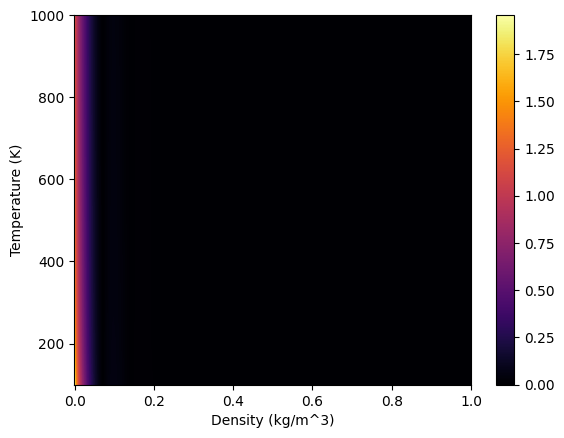

In [108]:
plt.figure(1)
#plt.pcolormesh(full_d_array, full_t_array, np.log10(p_frac_error), cmap = "inferno", vmin = min_p_frac_error, vmax = max_p_frac_error)
plt.pcolormesh(full_d_array, full_t_array, p_frac_error, cmap = "inferno")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

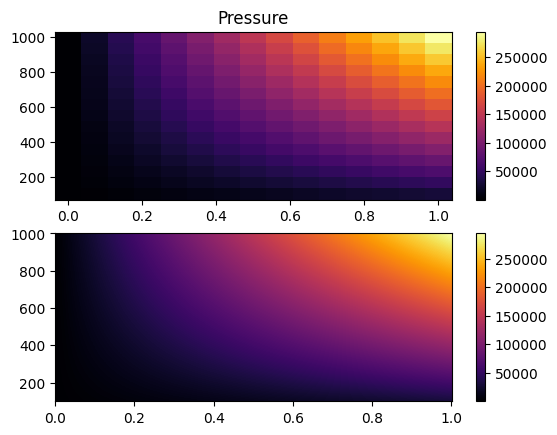

In [96]:
plt.figure(1)

#plt.xlabel("Density (kg/m^3)")
#plt.ylabel("Temperature (K)")

plt.subplot(211)
plt.title("Pressure")
plt.pcolormesh(d_array, t_array, p_array, cmap = "inferno")
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(full_d_array, full_t_array, interp_p_array, cmap = "inferno")
plt.colorbar()